In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("netflix.csv")

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


##Basic Sanity check of provided data-

In [ ]:
df.shape

# data has 8807 rows and 12 columns

(8807, 12)

In [ ]:
df.info()

#release_year is of int data type, rest all columns are object
#also some null values in director,cat,country,date_added,ratings,duration

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8800 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
np.all(df.duplicated())

#there are no duplicate rows in the data

False

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df["type"].value_counts()

# this is just giving counts

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [ ]:
df["type"].value_counts(normalize = True)*100

# this is giving percentage of movies and TV shows from 100%

Movie      69.615079
TV Show    30.384921
Name: type, dtype: float64

In [ ]:
df.index.values

array([   0,    1,    2, ..., 8804, 8805, 8806])

In [ ]:
df.describe()

# release_year basic info

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df.describe(include= object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8800,8807,8807,8807
unique,8807,2,8804,4528,7692,748,1767,14,220,514,8775
top,s1,Movie,15-Aug,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,2,19,19,2818,109,3207,1793,362,4


In [ ]:
df.isna().sum()

# null values in each columns

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
df.isna().sum(axis = 1)

# null values in the columns

0       1
1       1
2       1
3       3
4       1
       ..
8802    0
8803    3
8804    0
8805    0
8806    0
Length: 8807, dtype: int64

In [ ]:
np.all(df.isna().any(axis = 1))

#there are some null values in the rows

False

In [ ]:
df.isna().any(axis = 0)

# there are some null values in the columns as well

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration        False
listed_in       False
description     False
dtype: bool

In [ ]:
df.nunique()

# unique values in each column

show_id         8807
type               2
title           8804
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            14
duration         220
listed_in        514
description     8775
dtype: int64

In [ ]:
df.loc[df["type"]=="Movie"]["director"].nunique()

# there are 4354 unique movie director

4354

In [ ]:
df.loc[df["type"]=="Movie"]["title"].count()

# there are 6131 movie title in the data

6131

In [ ]:
df.loc[df["type"]=="Movie"]["listed_in"].nunique()

# there are 278 unique genre for movies

278

In [ ]:
df.loc[df["type"]=="TV Show"]["director"].nunique()

# there are 222 unique TV Show director

222

In [ ]:
df.loc[df["type"]=="TV Show"]["title"].count()

# there are 2676 TV shows title in the data

2676

In [ ]:
df.loc[df["type"]=="TV Show"]["listed_in"].nunique()

# there are 236 genre of for the TV shows

236

after basic EDA, found 2 problems-

1. there are multiple values in the cell, separated by comma in columns -cast, director, listed_in, country.

2. null values in rows and columns.






In [ ]:
# solution for problem-1

In [ ]:
df = df.set_index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added','release_year', 'rating', 'duration', 'description']).apply(lambda x: x.str.split(',').explode())

# this corrects the column listed_in

In [ ]:
df.reset_index(inplace = True)

In [ ]:
df.shape

# rows increased

(19323, 12)

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",International TV Shows
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",TV Dramas
3,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",TV Mysteries
4,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,Crime TV Shows


In [ ]:
df = df.set_index(['show_id', 'type', 'title', 'listed_in', 'cast', 'country', 'date_added','release_year', 'rating', 'duration','description']).apply(lambda x: x.str.split(',').explode())

# this corrects the column director

In [ ]:
df.reset_index(inplace = True)

In [ ]:
df.shape

# rows further increased

(20914, 12)

In [ ]:
df = df.set_index(['show_id', 'type', 'title', 'listed_in', 'cast', 'director', 'date_added','release_year', 'rating', 'duration','description']).apply(lambda x: x.str.split(',').explode())

# this corrects the column country

In [ ]:
df.reset_index(inplace = True)

In [ ]:
df.head()

,show_id,type,title,listed_in,cast,director,date_added,release_year,rating,duration,description,country
0,s1,Movie,Dick Johnson Is Dead,Documentaries,NaN,Kirsten Johnson,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",United States
1,s2,TV Show,Blood & Water,International TV Shows,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",NaN,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa
2,s2,TV Show,Blood & Water,TV Dramas,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",NaN,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa
3,s2,TV Show,Blood & Water,TV Mysteries,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",NaN,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa
4,s3,TV Show,Ganglands,Crime TV Shows,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Julien Leclercq,"September 24, 2021",2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,NaN


In [ ]:
df.shape

(25900, 12)

In [ ]:
# solution for problem-2

In [ ]:
group_data= df.groupby("listed_in")[["director"]].apply(lambda x:x.mode()).reset_index().drop_duplicates(subset="listed_in",keep="first")
group_data.drop("level_1",axis = 1, inplace = True)
group_data

# resolving null values for director
#getting director which had produced most movies in each genre

,listed_in,director
0,Anime Features,Toshiya Shinohara
1,Children & Family Movies,Steven Spielberg
2,Classic & Cult TV,Greg Tiernan
4,Classic Movies,Steven Spielberg
5,Comedies,Raja Gosnell
...,...,...
124,TV Comedies,Gary Howsam
131,TV Dramas,Daniel Minahan
133,TV Horror,Eli Roth
134,TV Shows,Arvind Swamy


In [ ]:
df.head()

,show_id,type,title,listed_in,cast,director,date_added,release_year,rating,duration,description,country
0,s1,Movie,Dick Johnson Is Dead,Documentaries,NaN,Kirsten Johnson,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",United States
1,s2,TV Show,Blood & Water,International TV Shows,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",NaN,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa
2,s2,TV Show,Blood & Water,TV Dramas,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",NaN,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa
3,s2,TV Show,Blood & Water,TV Mysteries,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",NaN,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa
4,s3,TV Show,Ganglands,Crime TV Shows,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Julien Leclercq,"September 24, 2021",2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,NaN


In [ ]:
df= df.merge(group_data, on= "listed_in", how = "inner")
df.head()

,show_id,type,title,listed_in,cast,director_x,date_added,release_year,rating,duration,description,country,director_y
0,s1,Movie,Dick Johnson Is Dead,Documentaries,NaN,Kirsten Johnson,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",United States,Matthew Salleh
1,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,Documentaries,NaN,Pedro de Echave García,"September 22, 2021",2020,TV-MA,67 min,Declassified documents reveal the post-WWII li...,NaN,Matthew Salleh
2,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,Documentaries,NaN,Pablo Azorín Williams,"September 22, 2021",2020,TV-MA,67 min,Declassified documents reveal the post-WWII li...,NaN,Matthew Salleh
3,s46,Movie,My Heroes Were Cowboys,Documentaries,NaN,Tyler Greco,"September 16, 2021",2021,PG,23 min,Robin Wiltshire's painful childhood was rescue...,NaN,Matthew Salleh
4,s69,Movie,Schumacher,Documentaries,Michael Schumacher,Hanns-Bruno Kammertöns,"September 15, 2021",2021,TV-14,113 min,Through exclusive interviews and archival foot...,NaN,Matthew Salleh


In [ ]:
df["director_x"] = df["director_x"].fillna(df["director_y"])

# replacing null values with the director who had produced most movies in genre

In [ ]:
df.drop(["director_y"], axis = 1, inplace = True)

In [ ]:
df.isna().sum()

# null values removed from director column

show_id            0
type               0
title              0
listed_in          0
cast            2149
director_x         0
date_added        20
release_year       0
rating             9
duration           0
description        0
country         1824
dtype: int64

In [ ]:
df[df["type"]=="Movie"]["country"].value_counts()

# United States is the country where most of the movies are made

United States     4769
India             2685
 United States     897
United Kingdom     810
 France            423
                  ... 
 Nicaragua           1
 Kazakhstan          1
 Sudan               1
Somalia              1
 Bahamas             1
Name: country, Length: 187, dtype: int64

In [ ]:
df.isna().sum()

show_id            0
type               0
title              0
listed_in          0
cast            2149
director_x         0
date_added        20
release_year       0
rating             9
duration           0
description        0
country         1824
dtype: int64

In [ ]:
 df.loc[df["type"]=="Movie","country"]= df[df["type"]=="Movie"]["country"].fillna("United States")

#  so using United states to fill null values for movies

In [ ]:
df.isna().sum()

show_id            0
type               0
title              0
listed_in          0
cast            2149
director_x         0
date_added        20
release_year       0
rating             9
duration           0
description        0
country          893
dtype: int64

In [ ]:
df[df["type"]=="TV Show"]["country"].value_counts()

# again United states is the country where most of the TV Shows are made

United States     1579
United Kingdom     675
South Korea        483
Japan              400
Taiwan             230
                  ... 
Cyprus               2
                     2
Czech Republic       1
 Hungary             1
 Luxembourg          1
Name: country, Length: 102, dtype: int64

In [ ]:
 df.loc[df["type"]=="TV Show","country"]= df[df["type"]=="TV Show"]["country"].fillna("United States")

#  filling United states for null values in country for TV Show

In [ ]:
df.isna().sum()

# removed null values from country column

show_id            0
type               0
title              0
listed_in          0
cast            2149
director_x         0
date_added        20
release_year       0
rating             9
duration           0
description        0
country            0
dtype: int64

In [ ]:
df[df["type"]=="Movie"]["date_added"].value_counts()

January 1, 2020       341
October 1, 2017       220
November 1, 2019      204
March 1, 2018         202
July 1, 2021          188
                     ... 
September 22, 2015      1
September 5, 2019       1
February 15, 2021       1
November 14, 2020       1
September 25, 2021      1
Name: date_added, Length: 1533, dtype: int64

In [ ]:
df.loc[df["type"]=="Movie","date_added"]= df[df["type"]=="Movie"]["date_added"].fillna("January 1, 2020")

In [ ]:
df.isna().sum()

show_id            0
type               0
title              0
listed_in          0
cast            2149
director_x         0
date_added        20
release_year       0
rating             9
duration           0
description        0
country            0
dtype: int64

In [ ]:
df[df["type"]=="TV Show"]["date_added"].value_counts()

July 6, 2021          84
August 1, 2017        62
June 19, 2021         53
July 1, 2017          52
January 1, 2016       50
                      ..
August 16, 2021        1
September 9, 2021      1
August 3, 2020         1
September 25, 2017     1
February 4, 2008       1
Name: date_added, Length: 1051, dtype: int64

In [ ]:
df.loc[df["type"]=="TV Show","date_added"]= df[df["type"]=="TV Show"]["date_added"].fillna("July 6, 2021")

In [ ]:
df.isna().sum()

# removed null values from date_added column

show_id            0
type               0
title              0
listed_in          0
cast            2149
director_x         0
date_added         0
release_year       0
rating             9
duration           0
description        0
country            0
dtype: int64

In [ ]:
df[df["type"]=="Movie"]["duration"].value_counts()

96 min     502
93 min     458
94 min     446
97 min     446
106 min    443
          ... 
189 min      2
18 min       2
10 min       1
273 min      1
191 min      1
Name: duration, Length: 205, dtype: int64

In [ ]:
df.loc[df["type"]=="Movie","duration"]= df[df["type"]=="Movie"]["duration"].fillna("96 min")

In [ ]:
df.isna().sum()

# removed null values for duration

show_id            0
type               0
title              0
listed_in          0
cast            2149
director_x         0
date_added         0
release_year       0
rating             9
duration           0
description        0
country            0
dtype: int64

In [ ]:
df[df["type"]=="Movie"]["rating"].value_counts()

TV-MA       6178
TV-14       4225
R           2664
PG-13       1730
TV-PG       1569
PG          1124
TV-G         328
TV-Y7        305
TV-Y         244
NR           240
G            159
TV-Y7-FV      14
NC-17         13
UR            11
Name: rating, dtype: int64

In [ ]:
df.loc[df["type"]=="Movie","rating"]= df[df["type"]=="Movie"]["rating"].fillna("TV-MA")

In [ ]:
df.isna().sum()

show_id            0
type               0
title              0
listed_in          0
cast            2149
director_x         0
date_added         0
release_year       0
rating             4
duration           0
description        0
country            0
dtype: int64

In [ ]:
df[df["type"]=="TV Show"]["rating"].value_counts()

TV-MA       3341
TV-14       1919
TV-PG        829
TV-Y7        429
TV-Y         333
TV-G         210
NR            14
R              4
TV-Y7-FV       3
Name: rating, dtype: int64

In [ ]:
df.loc[df["type"]=="TV Show","rating"]= df[df["type"]=="TV Show"]["rating"].fillna("TV-MA")

In [ ]:
df.isna().sum()

# removed null values from rating column

show_id            0
type               0
title              0
listed_in          0
cast            2149
director_x         0
date_added         0
release_year       0
rating             0
duration           0
description        0
country            0
dtype: int64

Note- we are not doing any analysis on cast column, hence not making any changes in the cast column

In [ ]:
df.rename({"director_x":"director"}, axis = 1, inplace = True)

In [ ]:
df.head()

,show_id,type,title,listed_in,cast,director,date_added,release_year,rating,duration,description,country
0,s1,Movie,Dick Johnson Is Dead,Documentaries,NaN,Kirsten Johnson,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",United States
1,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,Documentaries,NaN,Pedro de Echave García,"September 22, 2021",2020,TV-MA,67 min,Declassified documents reveal the post-WWII li...,United States
2,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,Documentaries,NaN,Pablo Azorín Williams,"September 22, 2021",2020,TV-MA,67 min,Declassified documents reveal the post-WWII li...,United States
3,s46,Movie,My Heroes Were Cowboys,Documentaries,NaN,Tyler Greco,"September 16, 2021",2021,PG,23 min,Robin Wiltshire's painful childhood was rescue...,United States
4,s69,Movie,Schumacher,Documentaries,Michael Schumacher,Hanns-Bruno Kammertöns,"September 15, 2021",2021,TV-14,113 min,Through exclusive interviews and archival foot...,United States


In [ ]:
df.shape

(25895, 12)

In [ ]:
df["country"].unique()

array(['United States', 'France', 'United Kingdom', ' United States',
       'Belgium', ' United Kingdom', 'Brazil', 'Egypt', ' Denmark',
       ' Germany', 'Germany', 'Argentina', 'United Arab Emirates',
       'Australia', 'Spain', 'India', ' China', 'Lebanon', ' Palestine',
       ' Qatar', 'Nigeria', 'Canada', 'Uruguay', 'Singapore', ' Canada',
       ' France', ' United Arab Emirates', ' Switzerland', 'Mexico',
       ' Mexico', 'South Africa', 'Thailand', 'Vietnam', 'Indonesia',
       'New Zealand', 'Switzerland', ' Belgium', 'Italy', ' Japan',
       ' Argentina', 'Kenya', ' Uruguay', ' Serbia', ' Guatemala',
       'Colombia', ' Hong Kong', ' Italy', ' Spain', ' Peru', 'Sweden',
       'Denmark', ' Sweden', ' Taiwan', 'Austria', ' Iraq', 'Poland', '',
       'Peru', 'Georgia', 'South Korea', 'Greece', ' Israel',
       'Netherlands', ' Australia', 'West Germany', ' Ukraine',
       ' Bermuda', ' Ecuador', ' Egypt', ' South Africa', ' Netherlands',
       ' Armenia', ' Jordan',

In [ ]:
df["country"].value_counts()

United States     8172
India             2901
United Kingdom    1485
 United States    1115
Japan              659
                  ... 
 Sudan               1
Somalia              1
 Kazakhstan          1
 Nicaragua           1
 Bahamas             1
Name: country, Length: 197, dtype: int64

In [ ]:
df["listed_in"].unique()

array(['Documentaries', 'International TV Shows', ' TV Dramas',
       ' TV Mysteries', 'Crime TV Shows', ' International TV Shows',
       ' TV Action & Adventure', 'Docuseries', ' Reality TV',
       ' Romantic TV Shows', ' TV Comedies', 'TV Dramas', ' TV Horror',
       'Children & Family Movies', 'Dramas', ' Independent Movies',
       ' International Movies', 'British TV Shows', 'Comedies', ' Dramas',
       ' Docuseries', ' Comedies', ' Crime TV Shows', 'TV Comedies',
       ' Spanish-Language TV Shows', 'Thrillers', ' Romantic Movies',
       ' Music & Musicals', 'Horror Movies', ' Sci-Fi & Fantasy',
       ' TV Thrillers', "Kids' TV", ' Thrillers', 'Action & Adventure',
       ' TV Sci-Fi & Fantasy', ' Classic Movies', ' Horror Movies',
       ' Anime Features', 'Reality TV', ' Sports Movies', 'Anime Series',
       " Kids' TV", 'International Movies', ' Korean TV Shows',
       'Sci-Fi & Fantasy', ' Science & Nature TV', ' Teen TV Shows',
       ' Cult Movies', 'Classic Movies

In [ ]:
df["listed_in"].value_counts()

 International Movies    3689
Dramas                   2313
Comedies                 1494
Action & Adventure       1305
Documentaries            1292
                         ... 
TV Horror                  12
 Stand-Up Comedy           12
 Classic & Cult TV          6
Romantic Movies             3
LGBTQ Movies                1
Name: listed_in, Length: 70, dtype: int64

In [ ]:
df["release_year"].unique()

array([2020, 2021, 2018, 1997, 2015, 2013, 2019, 1972, 2005, 1998, 2017,
       2014, 2004, 2008, 2009, 1979, 2016, 1980, 2012, 2002, 2010, 2007,
       2006, 2011, 1977, 1994, 1973, 1990, 1988, 1943, 1999, 2003, 2001,
       1995, 1974, 1996, 1992, 1967, 1986, 1993, 2000, 1989, 1954, 1991,
       1978, 1968, 1982, 1971, 1976, 1959, 1983, 1984, 1966, 1969, 1987,
       1985, 1955, 1981, 1975, 1958, 1956, 1970, 1960, 1962, 1964, 1963,
       1965, 1961, 1945, 1946, 1942, 1944, 1947, 1925])

In [ ]:
df["release_year"].value_counts()

2018    3326
2017    2894
2019    2871
2016    2679
2020    2511
        ... 
1942       4
1947       4
1966       3
1959       2
1925       1
Name: release_year, Length: 74, dtype: int64

#Analysis

**Assumption**- Since we do not have any measure to check user preference, hence we are considering the most occured in the data as user preference.

Q1- most watched movie and TV show?

In [ ]:
df[df["type"]=="Movie"]["title"].value_counts()

# most users watched this movie- Kahlil Gibran's The Prophet

Kahlil Gibran's The Prophet       100
HALO Legends                       72
Cloud Atlas                        36
Holidays                           36
Sincerely Yours, Dhaka             33
                                 ... 
American Warfighter                 1
American History X                  1
American Beauty                     1
Agatha and the Truth of Murder      1
Pierre Jackson                      1
Name: title, Length: 6128, dtype: int64

In [ ]:
df[df["type"]=="TV Show"]["title"].value_counts()

# most users watched this TV show- My Love: Six Stories of True Love

My Love: Six Stories of True Love    35
The Eddy                             32
Shaun the Sheep                      24
Til Death Do Us Part                 21
The Making of Frozen Planet          18
                                     ..
The Office (U.S.)                     1
The Guild                             1
That '70s Show                        1
Sensitive Skin                        1
Dinner for Five                       1
Name: title, Length: 2675, dtype: int64

Q2- which duration is preferred by users in both movies and Tv show?

In [ ]:
df[df["type"]=="Movie"]["duration"].value_counts()

# this shows that most users preferred 96 min duration movie

96 min     502
93 min     458
94 min     446
97 min     446
106 min    443
          ... 
189 min      2
18 min       2
10 min       1
273 min      1
191 min      1
Name: duration, Length: 205, dtype: int64

Text(0.5, 1.0, 'count_of_duration_for_movies')

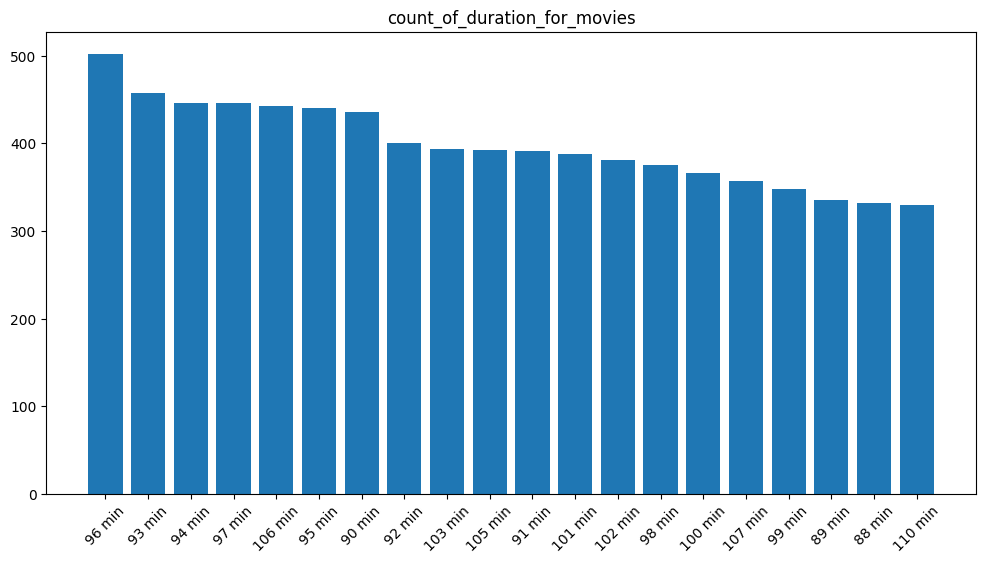

In [ ]:
x = df[df["type"]=="Movie"]["duration"].value_counts().index[:20]
y = df[df["type"]=="Movie"]["duration"].value_counts()[:20]
plt.figure(figsize=(12, 6))
plt.bar(x,y)
plt.xticks(rotation = 45, fontsize = 10)
plt.title("count_of_duration_for_movies")

In [ ]:
df[df["type"]=="TV Show"]["duration"].value_counts()

# this shows most users preferred only 1 season in the TV show

1 Season      4815
2 Seasons     1101
3 Seasons      523
4 Seasons      248
5 Seasons      160
6 Seasons       69
7 Seasons       62
8 Seasons       33
10 Seasons      23
9 Seasons       22
15 Seasons       9
12 Seasons       9
13 Seasons       6
11 Seasons       4
17 Seasons       2
Name: duration, dtype: int64

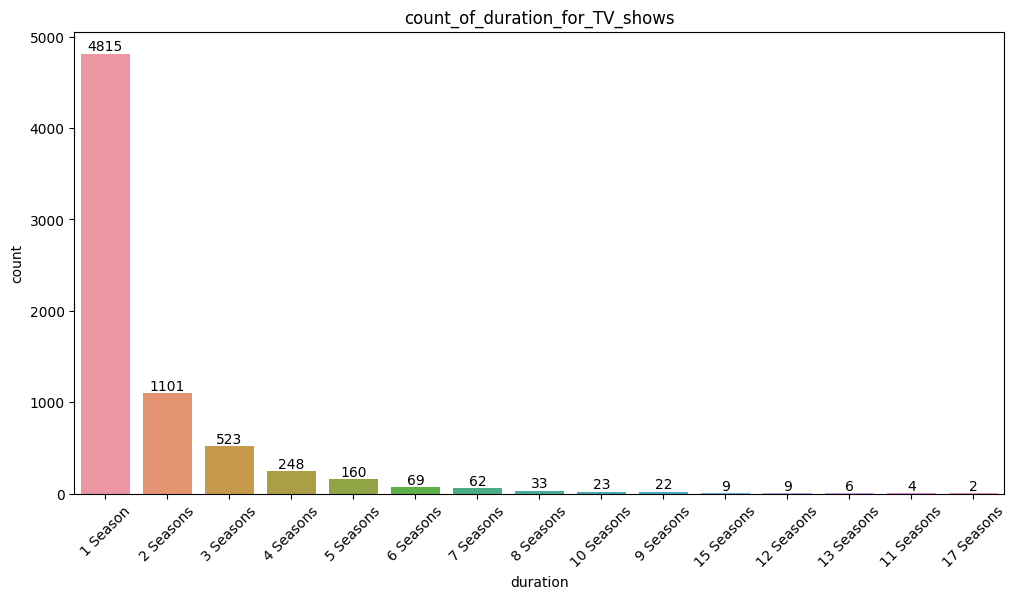

In [ ]:
df2 = df[df["type"]=="TV Show"]

plt.figure(figsize=(12, 6))

a = sns.countplot(data = df2, x = "duration", order= df[df["type"]=="TV Show"]["duration"].value_counts().index)
plt.xticks(rotation = 45, fontsize = 10)
plt.title("count_of_duration_for_TV_shows")
for i in a.containers:
  a.bar_label(i)

**observation**-

for movies, the users preferred 96-100 min movies.

for TV show, the users preferred 1 season only that is user prefer short duration TV show rather than long duration

**Recommendations**-

Netflix should produce movies of around 96-100 min movies, means of adequate duration, not too short not too long

Netflix should produce TV shows of short duration of 1 season only.


Q3- which is more preferred movie or TV show?

In [ ]:
df.shape

(25895, 12)

In [ ]:
df[df["type"]=="Movie"]["title"].count()

18809

In [ ]:
df[df["type"]=="TV Show"]["title"].count()

7086

**Observation**-

out of total 25000 titles, around 18500 are movies and only 7000 are Tv shows titles.

**Recommendations**-

from the above , Netflix should focus on producing more movies as compared to TV shows as users are more inclined to watch movies instead of Tv shows on the platform

Q4- In which country movies and Tv shows are produced more?

In [ ]:
df[df["type"]=="Movie"]["country"].value_counts()

United States     5700
India             2685
 United States     897
United Kingdom     810
 France            423
                  ... 
 Nicaragua           1
 Kazakhstan          1
 Sudan               1
Somalia              1
 Bahamas             1
Name: country, Length: 187, dtype: int64

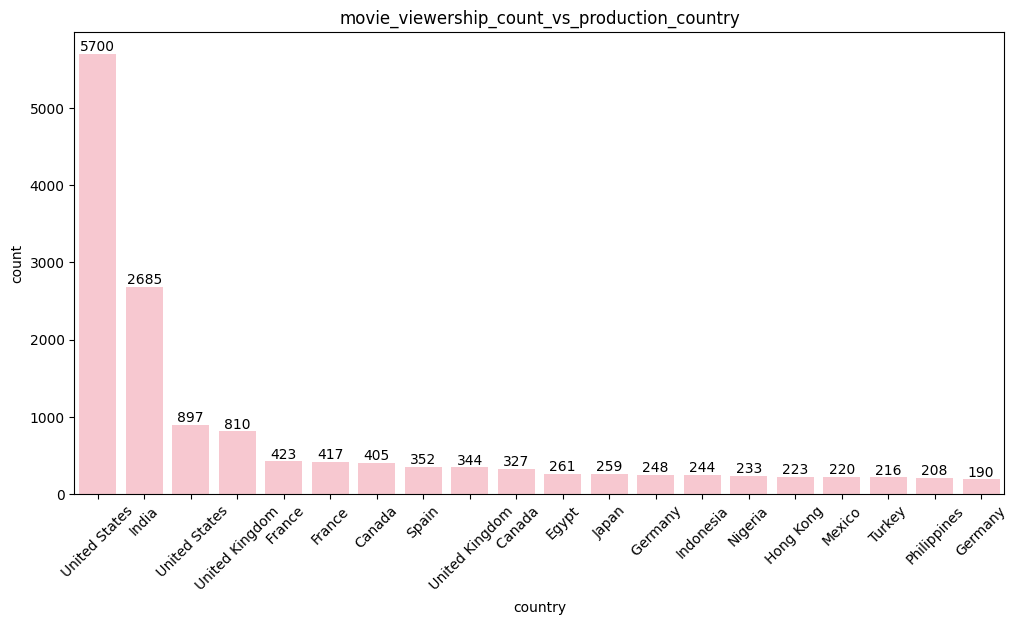

In [ ]:
df1 = df[df["type"]=="Movie"]["country"].value_counts().reset_index().rename({"index":"country","country":"count"}, axis = 1)[:20]
df1

plt.figure(figsize=(12,6))
plot = sns.barplot(data=df1, x="country",y="count",color = "pink")
plt.title("movie_viewership_count_vs_production_country")
plt.xticks(rotation= 45)
for i in plot.containers:
  plot.bar_label(i)
plt.show()

In [ ]:
df[df["type"]=="TV Show"]["country"].value_counts()

United States     2472
United Kingdom     675
South Korea        483
Japan              400
Taiwan             230
                  ... 
Cyprus               2
                     2
Czech Republic       1
 Hungary             1
 Luxembourg          1
Name: country, Length: 102, dtype: int64

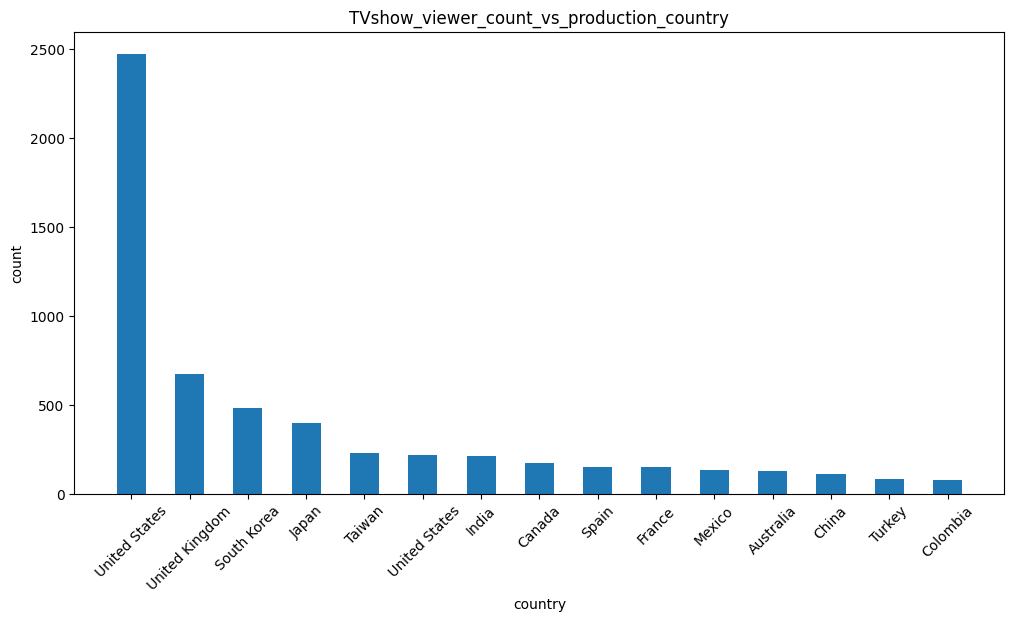

In [ ]:
x= df[df["type"]=="TV Show"]["country"].value_counts().index[:15]
y= df[df["type"]=="TV Show"]["country"].value_counts()[:15]

plt.figure(figsize=(12, 6))

plt.bar(x,y, width=0.5)
plt.xticks(rotation = 45, fontsize = 10)
plt.title("TVshow_viewer_count_vs_production_country")
plt.xlabel("country")
plt.ylabel("count")
plt.show()

**Observation**-

maximum number of movies and TV shows which are produced in the United states are preferred by the users to watch as compared to other countries.

**Recommendations**-

Netflix should invest more in the movies and Tv shows which are being produced in the United States as users like to watch them more, this will increase the users on the platform as the content which is being made available on the platform is being widely watched by users.

Q5- which director is most popular for directing movies and Tv shows?

In [ ]:
df[df["type"]=="Movie"]["director"].value_counts()

Youssef Chahine        105
Matthew Salleh          82
Rajiv Chilaka           62
Lars von Trier          51
Cathy Garcia-Molina     48
                      ... 
Andrew Dominik           1
Marie Clements           1
Jessie Nelson            1
David Frankel            1
Devin Chanda             1
Name: director, Length: 4886, dtype: int64

In [ ]:
df[df["type"]=="TV Show"]["director"].value_counts()

 Alan Poul             1456
Alastair Fothergill    1019
Thomas Astruc           624
Guy Vasilovich          471
Cecilia Peck            394
                       ... 
Fernando Moro             1
Vijay S. Bhanushali       1
Andrew Tan                1
 Stephen Murray           1
Eric Abrams               1
Name: director, Length: 300, dtype: int64

**observation**-

Director "Youssef Chahine" movies are most watched by the users and director "Alan Poul" TV Shows are most watched by users.

**Recommendation**-

Netflix should promote these director movies and Tv shows and if want to invest in movies, netflix should invest in these director movies and Tv shows as this will give good return in terms of profit as well as viewership.

Q6- which type/rating of movie and TV show are most watched by users?

In [ ]:
df[df["type"]=="Movie"].groupby("rating")["title"].count().sort_values()

rating
UR            11
NC-17         13
TV-Y7-FV      14
G            159
NR           240
TV-Y         244
TV-Y7        305
TV-G         328
PG          1124
TV-PG       1569
PG-13       1730
R           2664
TV-14       4225
TV-MA       6183
Name: title, dtype: int64

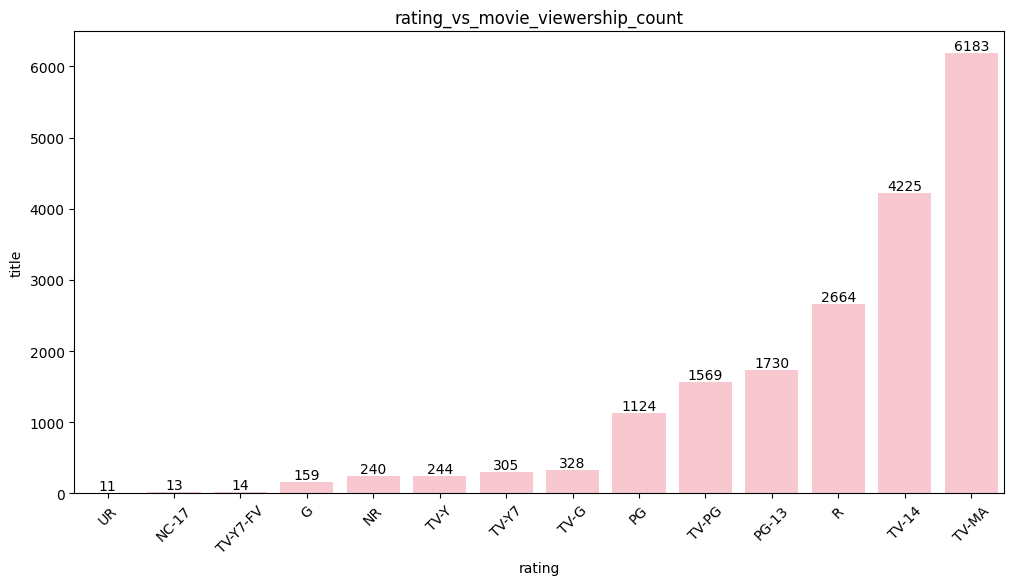

In [ ]:
df2 = df[df["type"]=="Movie"].groupby("rating")["title"].count().sort_values().reset_index()
df2



plt.figure(figsize=(12,6))
plot = sns.barplot(data=df2, x="rating",y="title",color = "pink")
plt.title("rating_vs_movie_viewership_count")
plt.xticks(rotation= 45)
for i in plot.containers:
  plot.bar_label(i)
plt.show()

In [ ]:
df[df["type"]=="TV Show"].groupby("rating")["director"].count().sort_values()

rating
TV-Y7-FV       3
R              4
NR            14
TV-G         210
TV-Y         333
TV-Y7        429
TV-PG        829
TV-14       1919
TV-MA       3345
Name: director, dtype: int64

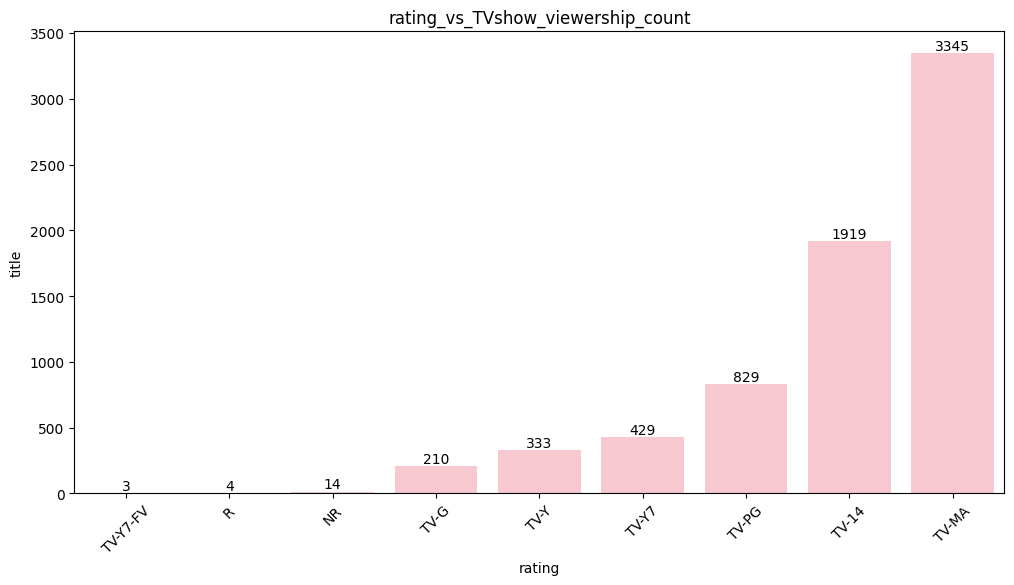

In [ ]:
df3 = df[df["type"]=="TV Show"].groupby("rating")["title"].count().sort_values().reset_index()
df3



plt.figure(figsize=(12,6))
plot = sns.barplot(data=df3, x="rating",y="title",color = "pink")
plt.title("rating_vs_TVshow_viewership_count")
plt.xticks(rotation= 45)
for i in plot.containers:
  plot.bar_label(i)
plt.show()

TV-MA rating means- TV-MA is the strongest rating the industry gives, with the M standing for "mature." TV-MA is reserved for shows whose level of explicit sexuality, graphic violence and/or strong language -- along with mature themes -- make them unsuitable for children 16 or younger.

**Observation**-

both the movies and Tv shows which are of rating TV-MA are most watched by users as compared to other rating movie/Tv shows.
this further shows most users like to watch 18+ content either in movies or Tv shows.

**Recommendation**-

since rating TV-MA movies and Tv shows are most watced by users, so netflix should increase the contect of this particular rating movie and TV shows in order to attract more users on the platform

Q7- for each rating, which is the top director in each category?

In [ ]:
df[df["type"]=="Movie"].groupby("rating")[["director"]].apply(lambda x: x.mode()).reset_index().drop("level_1", axis = 1)

,rating,director
0,G,Robert Vince
1,NC-17,Abdellatif Kechiche
2,NR,Alex Holmes
3,PG,Raja Gosnell
4,PG-13,Nora Twomey
5,R,Tom Hooper
6,TV-14,Youssef Chahine
7,TV-G,Lucas Margutti
8,TV-MA,Youssef Chahine
9,TV-PG,Juan Zapata


In [ ]:
df[df["type"]=="TV Show"].groupby("rating")[["director"]].apply(lambda x: x.mode()).reset_index().drop("level_1", axis = 1)

,rating,director
0,NR,Alastair Fothergill
1,R,Alan Poul
2,TV-14,Alan Poul
3,TV-G,Alastair Fothergill
4,TV-G,Thomas Astruc
5,TV-MA,Alan Poul
6,TV-PG,Alastair Fothergill
7,TV-Y,Thomas Astruc
8,TV-Y7,Thomas Astruc
9,TV-Y7-FV,Thomas Astruc


**Observation**-

the mention directors are the top directors in each rating category.

**Recommendation**-

say, if Netflix want to produce a particular rating movie, so they need to approach the top director which is most liked by the users, which will result in more users attraction on the platform



Q8- which is the top country in terms of movie/TV show production for each ratings?

In [ ]:
df[df["type"]=="Movie"].groupby("rating")[["country"]].apply(lambda x: x.mode()).reset_index().drop("level_1", axis = 1).drop_duplicates(subset= "rating", keep = "first")

,rating,country
0,G,United States
1,NC-17,Belgium
4,NR,United States
5,PG,United States
6,PG-13,United States
7,R,United States
8,TV-14,India
9,TV-G,United States
10,TV-MA,United States
11,TV-PG,United States


In [ ]:
df[df["type"]=="TV Show"].groupby("rating")[["country"]].apply(lambda x: x.mode()).reset_index().drop("level_1", axis = 1).drop_duplicates(subset= "rating", keep = "first")

,rating,country
0,NR,United Kingdom
1,R,Norway
2,TV-14,United States
3,TV-G,United States
4,TV-MA,United States
5,TV-PG,United States
6,TV-Y,United States
7,TV-Y7,United States
8,TV-Y7-FV,Canada


**Observation**-

in United states vast range of different ratings movies and TV shows are produced which are liked by the users.

**Recommendation**-

In order to produce or invest in a movie or a TV show, Netflix should prefer movies and TV shows which are being produced in US and also if they want diversity in content then also they should prefer US produced movies/TV shows.

Q9- on which added date, users prefer to watch movies/tv_show?

In [ ]:
df[df["type"]=="Movie"]["date_added"].value_counts()

January 1, 2020       341
October 1, 2017       220
November 1, 2019      204
March 1, 2018         202
July 1, 2021          188
                     ... 
September 22, 2015      1
September 5, 2019       1
February 15, 2021       1
November 14, 2020       1
September 25, 2021      1
Name: date_added, Length: 1533, dtype: int64

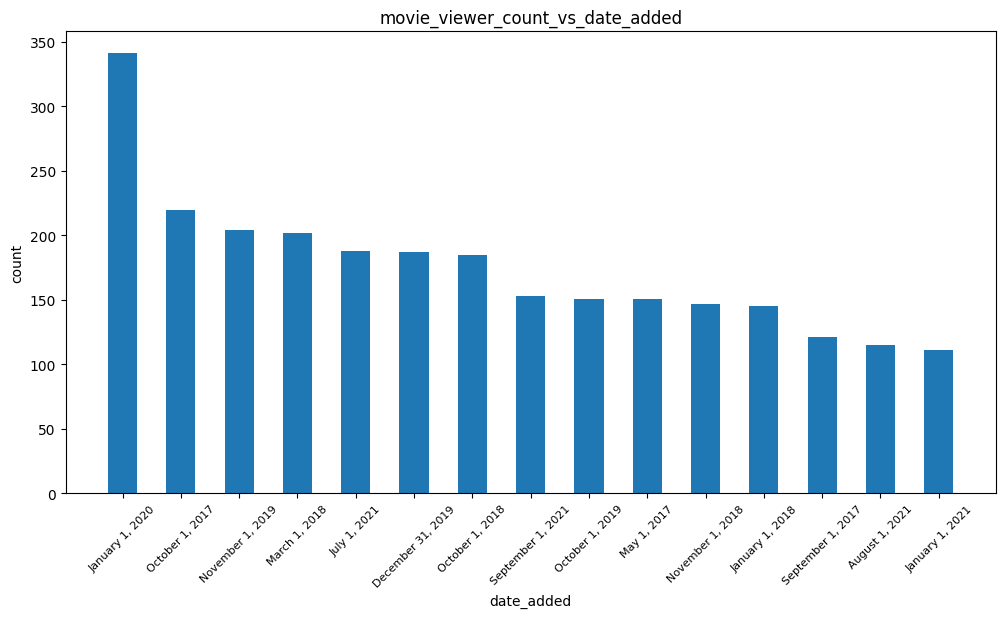

In [ ]:
x= df[df["type"]=="Movie"]["date_added"].value_counts().index[:15]
y= df[df["type"]=="Movie"]["date_added"].value_counts()[:15]

plt.figure(figsize=(12, 6))

plt.bar(x,y, width=0.5)
plt.xticks(rotation = 45, fontsize = 8)
plt.title("movie_viewer_count_vs_date_added")
plt.xlabel("date_added")
plt.ylabel("count")
plt.show()

In [ ]:
df[df["type"]=="TV Show"]["date_added"].value_counts()

July 6, 2021          104
August 1, 2017         62
June 19, 2021          53
July 1, 2017           52
January 1, 2016        50
                     ... 
August 16, 2021         1
September 9, 2021       1
August 3, 2020          1
September 25, 2017      1
February 4, 2008        1
Name: date_added, Length: 1051, dtype: int64

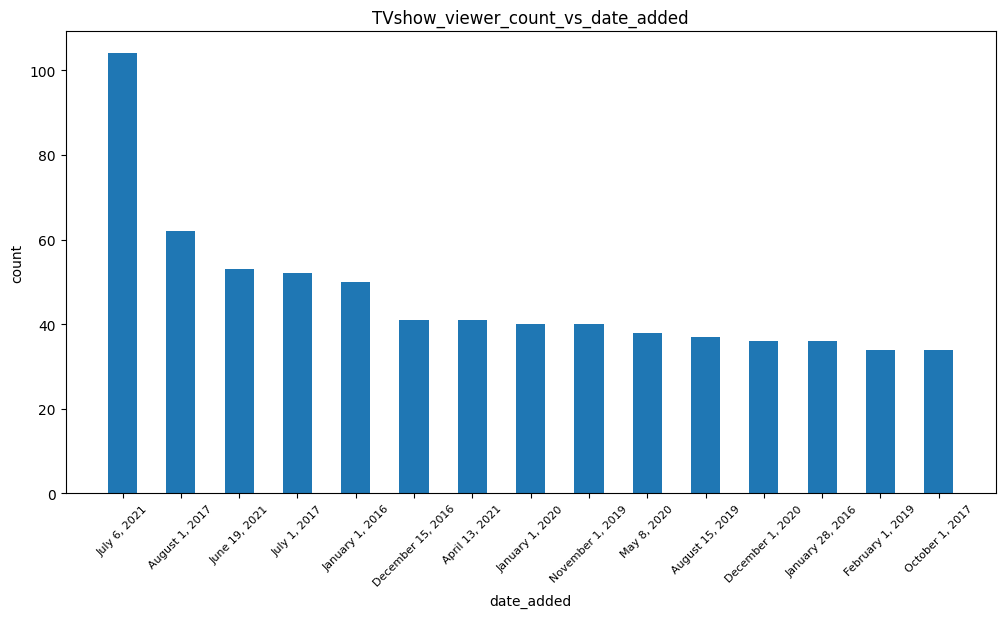

In [ ]:
x= df[df["type"]=="TV Show"]["date_added"].value_counts().index[:15]
y= df[df["type"]=="TV Show"]["date_added"].value_counts()[:15]

plt.figure(figsize=(12, 6))

plt.bar(x,y, width=0.5)
plt.xticks(rotation = 45, fontsize = 8)
plt.title("TVshow_viewer_count_vs_date_added")
plt.xlabel("date_added")
plt.ylabel("count")
plt.show()

**Observation**-

on "January 1, 2020", most users prefer to watch movies and on "July 6, 2021", most users prefer to watch TV shows.

**Recommendations**-

As most users, prefer to watch movies and TV shows on this particular date, so Netflix should prefer to add movies/TV shows on this date so as to increase the viewership on the platform.

Q10- what is difference between release date and added date on platform, users prefer to watch more?

In [ ]:
def func(x):
  a= x.split(",")
  return int(a[1])

df["date_added"]= df["date_added"].apply(func)

In [ ]:
df.head()

,show_id,type,title,listed_in,cast,director,date_added,release_year,rating,duration,description,country
0,s1,Movie,Dick Johnson Is Dead,Documentaries,NaN,Kirsten Johnson,2021,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",United States
1,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,Documentaries,NaN,Pedro de Echave García,2021,2020,TV-MA,67 min,Declassified documents reveal the post-WWII li...,United States
2,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,Documentaries,NaN,Pablo Azorín Williams,2021,2020,TV-MA,67 min,Declassified documents reveal the post-WWII li...,United States
3,s46,Movie,My Heroes Were Cowboys,Documentaries,NaN,Tyler Greco,2021,2021,PG,23 min,Robin Wiltshire's painful childhood was rescue...,United States
4,s69,Movie,Schumacher,Documentaries,Michael Schumacher,Hanns-Bruno Kammertöns,2021,2021,TV-14,113 min,Through exclusive interviews and archival foot...,United States


In [ ]:
df["diff"] = df["date_added"]- df["release_year"]

In [ ]:
df.head()

,show_id,type,title,listed_in,cast,director,date_added,release_year,rating,duration,description,country,diff
0,s1,Movie,Dick Johnson Is Dead,Documentaries,NaN,Kirsten Johnson,2021,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",United States,1
1,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,Documentaries,NaN,Pedro de Echave García,2021,2020,TV-MA,67 min,Declassified documents reveal the post-WWII li...,United States,1
2,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,Documentaries,NaN,Pablo Azorín Williams,2021,2020,TV-MA,67 min,Declassified documents reveal the post-WWII li...,United States,1
3,s46,Movie,My Heroes Were Cowboys,Documentaries,NaN,Tyler Greco,2021,2021,PG,23 min,Robin Wiltshire's painful childhood was rescue...,United States,0
4,s69,Movie,Schumacher,Documentaries,Michael Schumacher,Hanns-Bruno Kammertöns,2021,2021,TV-14,113 min,Through exclusive interviews and archival foot...,United States,0


In [ ]:
df[df["type"]=="Movie"]["diff"].value_counts()

0     4908
1     3762
2     1563
3     1262
4      845
      ... 
70       4
60       4
63       3
50       3
71       2
Name: diff, Length: 71, dtype: int64

In [ ]:
df[df["type"]=="TV Show"]["diff"].value_counts().head()

0    3681
1    1123
2     573
3     392
4     274
Name: diff, dtype: int64

**Observations**-

it is clear from the above, that maximum users prefer to watch the movies/TV shows when they are added on platform in same year as of release year.

**Recommendations**-

Netflix should try to reduce the time to added content on platform after release so that more number of users can watch latest content on netflix instead of migrating on other platforms. this can become USP for netlfix.

Q11- which director is active for most of year and how much movies they had directed in that time?

In [ ]:
df[df["type"]=="Movie"].groupby(["director"])["release_year", "title"].aggregate({"release_year": [min, max], "title": "count"}).sort_values(("title","count"),ascending = False)

<ipython-input-737-1288cb84f8d5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[df["type"]=="Movie"].groupby(["director"])["release_year", "title"].aggregate({"release_year": [min, max], "title": "count"}).sort_values(("title","count"),ascending = False)


release_year       title
                          min   max count
director                                 
Youssef Chahine          1954  2021   105
Matthew Salleh           1979  2021    82
Rajiv Chilaka            2009  2021    62
Lars von Trier           2010  2021    51
Suhas Kadav              2013  2021    48
...                       ...   ...   ...
C.J. Wallis              2017  2017     1
 Elizabeth Banks         2013  2013     1
Caio Cobra               2017  2017     1
 Dylan Southern          2013  2013     1
Sam de Jong              2019  2019     1

[4886 rows x 3 columns]

In [ ]:
df[df["type"]=="TV Show"].groupby(["director"])["release_year", "title"].aggregate({"release_year": [min, max], "title": "count"}).sort_values(("title","count"),ascending = False)

<ipython-input-738-5d8cecacd159>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[df["type"]=="TV Show"].groupby(["director"])["release_year", "title"].aggregate({"release_year": [min, max], "title": "count"}).sort_values(("title","count"),ascending = False)


release_year       title
                              min   max count
director                                     
 Alan Poul                   1972  2021  1456
Alastair Fothergill          1974  2021  1019
Thomas Astruc                1989  2021   624
Guy Vasilovich               1967  2021   471
Cecilia Peck                 1999  2021   394
...                           ...   ...   ...
Padraic McKinley             2018  2018     1
 Rashida Jones               2017  2017     1
 Rathindran R Prasad         2021  2021     1
Oliver Stone                 2013  2013     1
 Stephen Murray              2018  2018     1

[300 rows x 3 columns]

**Observation**-

for movies- "Youssef Chahine" is widely active over the years and users like to watch this director movies more.

for TV shows- "Alan Poul" is widely active ove rhte years and users like to watch this director content more.

**Recommendations**-

to produce or to invest netflix can reach these directors in order to create new content for the users as they have most experience among others and also users like to watch their content.

Q12- which genre is most liked among users in both movies and TV shows?

In [ ]:
df[df["type"]=="Movie"]["listed_in"].value_counts().head(10)

 International Movies       3689
Dramas                      2313
Comedies                    1494
Action & Adventure          1305
Documentaries               1292
 Dramas                     1136
 Independent Movies         1124
Children & Family Movies    1016
 Thrillers                   751
 Romantic Movies             746
Name: listed_in, dtype: int64

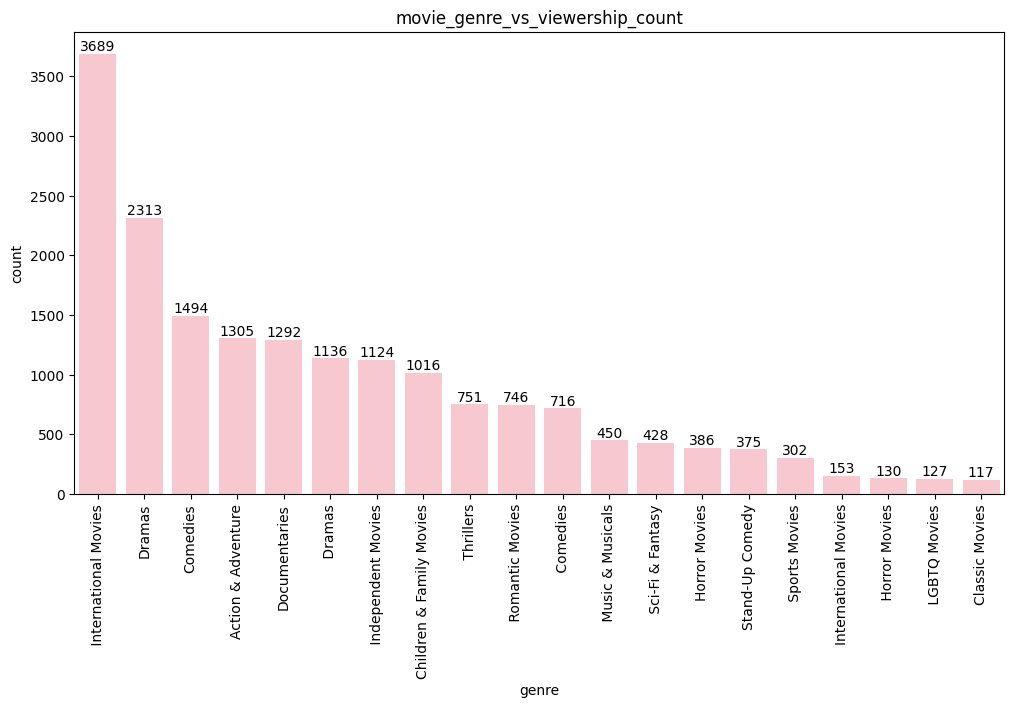

In [ ]:
df5 = df[df["type"]=="Movie"]["listed_in"].value_counts().reset_index().rename({"index":"genre","listed_in": "count"}, axis = 1)[:20]
df5

plt.figure(figsize=(12,6))
plot = sns.barplot(data=df5, x="genre",y="count",color = "pink")
plt.title("movie_genre_vs_viewership_count")
plt.xticks(rotation= 90)
for i in plot.containers:
  plot.bar_label(i)
plt.show()

In [ ]:
df[df["type"]=="TV Show"]["listed_in"].value_counts().head(10)

International TV Shows     858
 TV Dramas                 804
 International TV Shows    658
 TV Comedies               514
Kids' TV                   506
Crime TV Shows             469
 Romantic TV Shows         351
British TV Shows           308
Docuseries                 274
 Docuseries                206
Name: listed_in, dtype: int64

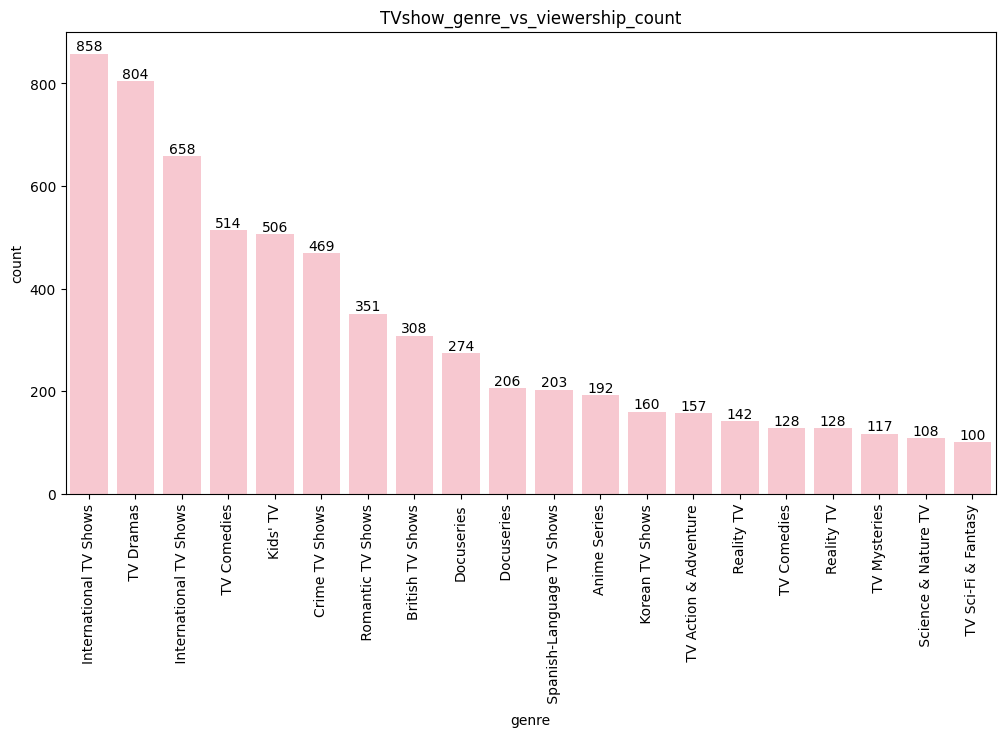

In [ ]:
df6 = df[df["type"]=="TV Show"]["listed_in"].value_counts().reset_index().rename({"index":"genre","listed_in": "count"}, axis = 1)[:20]
df6

plt.figure(figsize=(12,6))
plot = sns.barplot(data=df6, x="genre",y="count",color = "pink")
plt.title("TVshow_genre_vs_viewership_count")
plt.xticks(rotation= 90)
for i in plot.containers:
  plot.bar_label(i)
plt.show()

**observation**-

for both movies and TV shows users like to watch intenational content, means of different country or origin.

**Recommendation**-

Netflix should produce more content in this genre so as to increase viewership and users on the platform.

Q13- what is average duration time for movies and TV shows?

In [ ]:
def spl(x):
  a = x.split()
  return int(a[0])

df["duration"]= df["duration"].apply(spl)

In [ ]:
df.head()

,show_id,type,title,listed_in,cast,director,date_added,release_year,rating,duration,description,country,diff
0,s1,Movie,Dick Johnson Is Dead,Documentaries,NaN,Kirsten Johnson,2021,2020,PG-13,90,"As her father nears the end of his life, filmm...",United States,1
1,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,Documentaries,NaN,Pedro de Echave García,2021,2020,TV-MA,67,Declassified documents reveal the post-WWII li...,United States,1
2,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,Documentaries,NaN,Pablo Azorín Williams,2021,2020,TV-MA,67,Declassified documents reveal the post-WWII li...,United States,1
3,s46,Movie,My Heroes Were Cowboys,Documentaries,NaN,Tyler Greco,2021,2021,PG,23,Robin Wiltshire's painful childhood was rescue...,United States,0
4,s69,Movie,Schumacher,Documentaries,Michael Schumacher,Hanns-Bruno Kammertöns,2021,2021,TV-14,113,Through exclusive interviews and archival foot...,United States,0


In [ ]:
df[df["type"]=="Movie"]["duration"].mean()

103.17390610877771

In [ ]:
df[df["type"]=="TV Show"]["duration"].mean()

1.7382162009596387

**Observation**-

the mean as expected, as already seen in above most of the users like to watch movies of duration of around 100 min, and Tv shows of 1 season more as compared to other duration.

**Recommendation**-

as mean is already near to most prefer duration, so netflix should continue to produce more content of this duration and try to save cost by reducing movies/TV shows of long duration since they are least preferred by users.

Q14- what is range of year of movies/Tv shows available on netflix and how many users watch them?

In [ ]:
df[df["type"]=="Movie"]["release_year"].value_counts()

2018    2341
2017    2205
2016    2032
2019    1795
2015    1382
        ... 
1961       4
1963       3
1966       3
1946       2
1959       2
Name: release_year, Length: 73, dtype: int64

In [ ]:
df[df["type"]=="TV Show"]["release_year"].value_counts()

2020    1218
2019    1076
2018     985
2021     833
2017     689
2016     647
2015     445
2014     213
2012     163
2013     163
2011     118
2010      92
2009      89
2008      62
2006      41
2007      31
2005      27
2003      24
2004      21
2002      19
1999      16
1997      15
2001      11
2000       9
1998       9
1990       7
1993       7
1992       6
1986       6
1996       5
1946       4
1972       4
1988       3
1974       3
1994       3
1995       3
1977       3
1979       3
1967       2
1989       2
1963       2
1981       2
1985       2
1945       1
1925       1
1991       1
Name: release_year, dtype: int64

**Observations**-

movies are available from year 1959 to 2018 and as seen most of the users like to watch atmost 3-4 year old movie.

and as for TV show they are available from year 1991 to 2020 and most of the users like to watch atmost 3-4 year old shows.

**Recommendation**-

Netflix should regularly upddate the content with the new content as more users like to watch latest content, and moreover if wants can remove very old content from the platform as almost none users watch them.

Q15- what percentage of total movies and TV shows are produced in top country?

In [ ]:
df[df["type"]=="Movie"]["country"].value_counts().max()

5700

In [ ]:
df[df["type"]=="Movie"]["country"].count()

18809

In [ ]:
percent_of_movies_in_top_country = ((df[df["type"]=="Movie"]["country"].value_counts().max())/(df[df["type"]=="Movie"]["country"].count()))*100
percent_of_movies_in_top_country


30.304641395076825

In [ ]:
df[df["type"]=="TV Show"]["country"].value_counts().max()

2472

In [ ]:
df[df["type"]=="TV Show"]["country"].count()

7086

In [ ]:
percent_of_TVshow_in_top_country = (df[df["type"]=="TV Show"]["country"].value_counts().max()/df[df["type"]=="TV Show"]["country"].count())*100
percent_of_TVshow_in_top_country

34.885690093141406

In [ ]:
percent_of_total_content = (df[df["country"]=="United States"]["title"].count()/df["title"].count())*100
percent_of_total_content

31.55821587178992

**observations**-

30% of total movies are being produced in the US and around 34% of TV shows are also being produced in US, and total of 31% content is being produced in US only.

**Recommendations**-

since users like to watch country US origin content more than any other country content, so netflix should focus on investing and producing more for US origin content.

In [ ]:
df.head()

,show_id,type,title,listed_in,cast,director,date_added,release_year,rating,duration,description,country,diff
0,s1,Movie,Dick Johnson Is Dead,Documentaries,NaN,Kirsten Johnson,2021,2020,PG-13,90,"As her father nears the end of his life, filmm...",United States,1
1,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,Documentaries,NaN,Pedro de Echave García,2021,2020,TV-MA,67,Declassified documents reveal the post-WWII li...,United States,1
2,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,Documentaries,NaN,Pablo Azorín Williams,2021,2020,TV-MA,67,Declassified documents reveal the post-WWII li...,United States,1
3,s46,Movie,My Heroes Were Cowboys,Documentaries,NaN,Tyler Greco,2021,2021,PG,23,Robin Wiltshire's painful childhood was rescue...,United States,0
4,s69,Movie,Schumacher,Documentaries,Michael Schumacher,Hanns-Bruno Kammertöns,2021,2021,TV-14,113,Through exclusive interviews and archival foot...,United States,0


Q16- for each director what is min and max duration of movie/TV show directed ?

In [ ]:
df[df["type"]=="Movie"].groupby("director")["duration","title"].aggregate({"duration":["min" , "max", "mean"],"title": "count"}).sort_values(("title","count"), ascending = False)

<ipython-input-757-c6780c4ea7ce>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[df["type"]=="Movie"].groupby("director")["duration","title"].aggregate({"duration":["min" , "max", "mean"],"title": "count"}).sort_values(("title","count"), ascending = False)


duration                  title
                      min  max        mean count
director                                        
Youssef Chahine        14  312  107.676190   105
Matthew Salleh         10  273   79.573171    82
Rajiv Chilaka          22  112   58.935484    62
Lars von Trier         75  312  118.627451    51
Suhas Kadav            32  141   82.854167    48
...                   ...  ...         ...   ...
C.J. Wallis            72   72   72.000000     1
 Elizabeth Banks       94   94   94.000000     1
Caio Cobra             73   73   73.000000     1
 Dylan Southern        80   80   80.000000     1
Sam de Jong            89   89   89.000000     1

[4886 rows x 4 columns]

In [ ]:
df[df["type"]=="TV Show"].groupby("director")["duration","title"].aggregate({"duration":["min" , "max", "mean"],"title": "count"}).sort_values(("title","count"), ascending = False)

<ipython-input-758-711fa39f37df>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[df["type"]=="TV Show"].groupby("director")["duration","title"].aggregate({"duration":["min" , "max", "mean"],"title": "count"}).sort_values(("title","count"), ascending = False)


duration               title
                          min max      mean count
director                                         
 Alan Poul                  1  17  1.567308  1456
Alastair Fothergill         1  12  1.543670  1019
Thomas Astruc               1  10  2.105769   624
Guy Vasilovich              1  13  1.966030   471
Cecilia Peck                1  15  1.817259   394
...                       ...  ..       ...   ...
Padraic McKinley            1   1  1.000000     1
 Rashida Jones              1   1  1.000000     1
 Rathindran R Prasad        1   1  1.000000     1
Oliver Stone                1   1  1.000000     1
 Stephen Murray             1   1  1.000000     1

[300 rows x 4 columns]

**observations**-

this shows the min,max and mean durations of content directed by each director. and correspondingly also shows the count of users watched the content directed by that director.

**Recommendations**-

netflix should promote the content which is neither too long nor too short as maximum number of viewers like avg duration length of movie and TV shows.

Q17-In which release year most movies/tvshows are watched by users?

In [ ]:
df.loc[df["type"]=="TV Show"].groupby("release_year")["title"].count().sort_values( ascending = False)[:5]

release_year
2020    1218
2019    1076
2018     985
2021     833
2017     689
Name: title, dtype: int64

In [ ]:
df[df["type"]=="TV Show"][["date_added"]].value_counts().sort_values( ascending = False)[:5]

date_added
2020          1615
2019          1561
2021          1328
2018          1063
2017           924
dtype: int64

In [ ]:
df.head()

,show_id,type,title,listed_in,cast,director,date_added,release_year,rating,duration,description,country,diff
0,s1,Movie,Dick Johnson Is Dead,Documentaries,NaN,Kirsten Johnson,2021,2020,PG-13,90,"As her father nears the end of his life, filmm...",United States,1
1,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,Documentaries,NaN,Pedro de Echave García,2021,2020,TV-MA,67,Declassified documents reveal the post-WWII li...,United States,1
2,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,Documentaries,NaN,Pablo Azorín Williams,2021,2020,TV-MA,67,Declassified documents reveal the post-WWII li...,United States,1
3,s46,Movie,My Heroes Were Cowboys,Documentaries,NaN,Tyler Greco,2021,2021,PG,23,Robin Wiltshire's painful childhood was rescue...,United States,0
4,s69,Movie,Schumacher,Documentaries,Michael Schumacher,Hanns-Bruno Kammertöns,2021,2021,TV-14,113,Through exclusive interviews and archival foot...,United States,0


Q18- which is the last movie/Tv show directed by each director and in which year?

In [ ]:
df[df["type"]=="Movie"].groupby(["director","release_year"])["title"].apply(lambda x : x.mode()).reset_index().drop("level_2", axis = 1).drop_duplicates(subset= "director",keep = "last").reset_index(drop = True)

,director,release_year,title
0,Aaron Moorhead,2020,Synchronic
1,Aaron Woolf,2016,To Be a Miss
2,Abbas Alibhai Burmawalla,2008,Race
3,Abdullah Al Noor,2018,"Sincerely Yours, Dhaka"
4,Abhinav Shiv Tiwari,2015,X: Past Is Present
...,...,...,...
4881,Çagan Irmak,2005,Babam ve Oğlum
4882,Ísold Uggadóttir,2018,And Breathe Normally
4883,Óskar Thór Axelsson,2017,Ég man þig
4884,Ömer Faruk Sorak,2011,Aşk Tesadüfleri Sever


In [ ]:
df[df["type"]=="TV Show"].groupby(["director","release_year"])["title"].apply(lambda x : x.mode()).reset_index().drop("level_2", axis = 1).drop_duplicates(subset= "director",keep = "last").reset_index(drop = True)

,director,release_year,title
0,Abhishek Chaubey,2021,Ray
1,Aco Tenriyagelli,2020,Quarantine Tales
2,Alan Poul,2021,Ragnarok
3,Alban Teurlai,2020,Move
4,Andrés Beltrán,2019,Bolívar
...,...,...,...
295,Vijay S. Bhanushali,2019,Bal Ganesh
296,Vikramaditya Motwane,2019,Sacred Games
297,Wouter Bouvijn,2019,The Twelve
298,Yasuhiro Irie,2010,Fullmetal Alchemist: Brotherhood


Q19- what is trend in viewership over the years?

In [ ]:
df[df["type"]=="Movie"].groupby("date_added")["title"].count()

date_added
2008       3
2009       3
2010       2
2011      38
2012       5
2013      11
2014      52
2015     168
2016     756
2017    2734
2018    3832
2019    4317
2020    3928
2021    2960
Name: title, dtype: int64

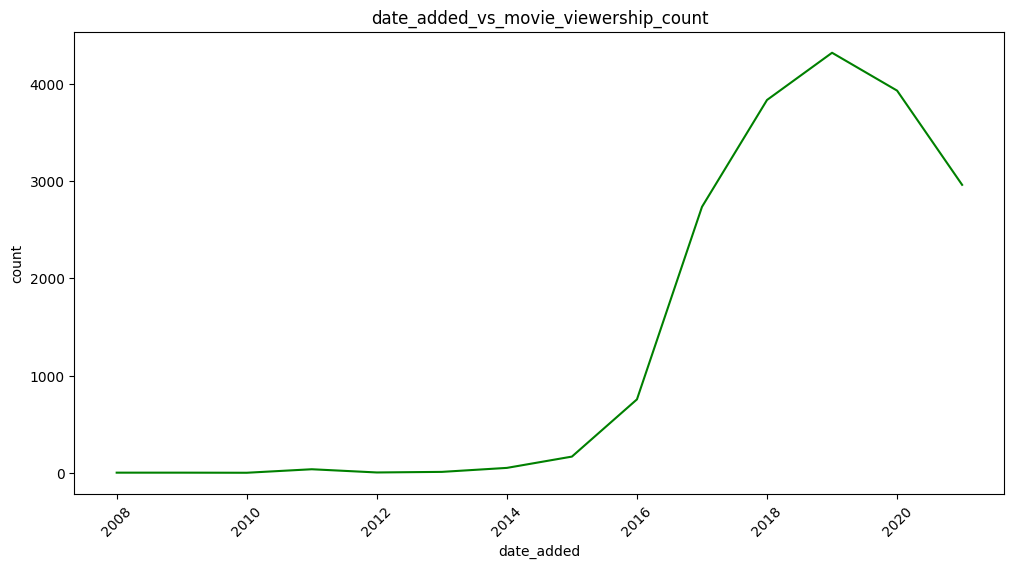

In [ ]:
df7 = df[df["type"]=="Movie"].groupby("date_added")["title"].count().reset_index().rename({"title":"count"}, axis = 1)
df7


plt.figure(figsize=(12,6))
plot = sns.lineplot(data=df7, x="date_added",y="count",color = "green")
plt.title("date_added_vs_movie_viewership_count")
plt.xticks(rotation= 45)
plt.show()

In [ ]:
df[df["type"]=="TV Show"].groupby("date_added")["title"].count()

date_added
2008       1
2013      19
2014      17
2015      68
2016     490
2017     924
2018    1063
2019    1561
2020    1615
2021    1328
Name: title, dtype: int64

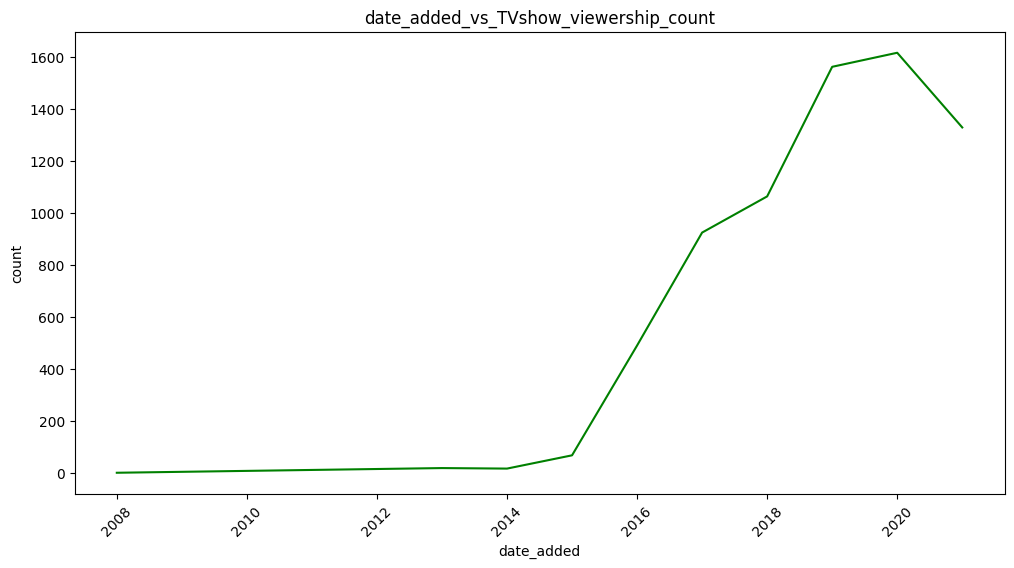

In [ ]:
df8 = df[df["type"]=="TV Show"].groupby("date_added")["title"].count().reset_index().rename({"title":"count"}, axis = 1)
df8


plt.figure(figsize=(12,6))
plot = sns.lineplot(data=df8, x="date_added",y="count",color = "green")
plt.title("date_added_vs_TVshow_viewership_count")
plt.xticks(rotation= 45)
plt.show()

**observation**-

for both movies and TV shows there is steady increase in viewership over last 8-11 years, but in year 2020 and 2021 viewership declines for movies and in year 2021 viewership declines for TV shows.

**Recommendations**-

in year 2020 and 2021 the world was suffering from covid wave so there might be some impact on viewership because of covid.
to increase the viewership, netflix can provide some modification in subscription charge or to motivate the users to watch,] production of motivational content can be increased.

In [ ]:
df1 = df.head()

In [ ]:
def func(x):

  return x.split(", ")




df1["listed_in"].apply(func)

0                                      [Documentaries]
1    [International TV Shows, TV Dramas, TV Mysteries]
2    [Crime TV Shows, International TV Shows, TV Ac...
3                             [Docuseries, Reality TV]
4    [International TV Shows, Romantic TV Shows, TV...
Name: listed_in, dtype: object

In [ ]:
df1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df1 = df1.set_index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added','release_year', 'rating', 'duration', 'description']).apply(lambda x: x.str.split(',').explode())



In [ ]:
df1.reset_index()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",International TV Shows
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",TV Dramas
3,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",TV Mysteries
4,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,Crime TV Shows
5,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,International TV Shows
6,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,TV Action & Adventure
7,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Feuds, flirtations and toilet talk go down amo...",Docuseries
8,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Feuds, flirtations and toilet talk go down amo...",Reality TV
9,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...,International TV Shows
